In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
IMG_SIZE = 224
BATCH_SIZE = 32

In [8]:
train_datagen =ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator = \
train_datagen.flow_from_directory('/content/drive/MyDrive/brain_tumour',
 target_size=(IMG_SIZE, IMG_SIZE),
 batch_size=BATCH_SIZE,
 class_mode='binary',
 subset='training')


Found 291 images belonging to 3 classes.


In [11]:
val_generator =train_datagen.flow_from_directory('/content/drive/MyDrive/brain_tumour',
 target_size=(IMG_SIZE, IMG_SIZE),
 batch_size=BATCH_SIZE,
 class_mode='binary',
 subset='validation')

Found 71 images belonging to 3 classes.


In [12]:
model = keras.Sequential([
 layers.Conv2D(32, (3, 3), activation='relu',
 input_shape=(IMG_SIZE, IMG_SIZE, 3)),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(128, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(train_generator, epochs=5, validation_data=val_generator,batch_size= BATCH_SIZE)

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.6237 - loss: 0.8881 - val_accuracy: 0.6338 - val_loss: 0.6928
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.7102 - loss: 0.6294 - val_accuracy: 0.5352 - val_loss: 0.7313
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.7214 - loss: 0.6301 - val_accuracy: 0.4366 - val_loss: 1.0003
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.7028 - loss: 0.5927 - val_accuracy: 0.4789 - val_loss: 0.8955
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.7546 - loss: 0.4996 - val_accuracy: 0.2817 - val_loss: 0.9960


In [17]:
model.save('/content/drive/MyDrive/brain_tumour/brain_tumour.h5')

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model = load_model('/content/drive/MyDrive/brain_tumour/brain_tumour.h5')
print("Model Loaded")

Model Loaded


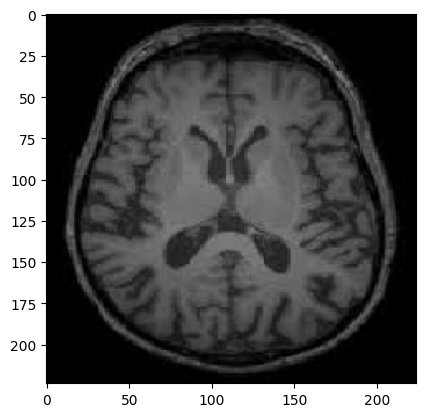

In [24]:
test_image_path="/content/drive/MyDrive/brain_tumour/brain_tumor_dataset/no/10 no.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()


In [25]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /= 255
prediction =model.predict(img_array)
print(prediction)
if prediction>= 0.5:
   print("You have brain tumor.")
else:
   print("You do not have brain tumor.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[[0.41259015]]
You do not have brain tumor.
